In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# For data splitting
from sklearn.model_selection import train_test_split
# For standardization
from sklearn.preprocessing import StandardScaler



from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap

In [2]:
# Read the online wine data set with no headers
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

# Assign column labels
# The feature names can be found online.
df_wine.columns = ['Class label', 
              'Alcohol', 
              'Malic acid', 
              'Ash', 
              'Alcalinity of ash', 
              'Magnesium', 
              'Total phenols', 
              'Flavanoids', 
              'Nonflavanoid phenols', 
              'Proanthocyanins', 
              'Color intensity', 
              'Hue', 
              'OD280/OD315 of diluted wines', 
              'Proline']

# Split the data set into a training set and a test set
y = df_wine.iloc[:, 0].values
X = df_wine.iloc[:, 1:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
# test_size=0.3: the testing set contains 30% data
# stratify=y: both the train and testing sets have the same class proportions as the original dataset.

# Standardization
# Create a scaler
stdsc = StandardScaler()
# Fit and transform the training set
X_train_std = stdsc.fit_transform(X_train)
# Transform the testing set with the same scaler
X_test_std = stdsc.transform(X_test)

In [3]:
# Create LDA model and use it to transform data
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

In [4]:
# Logistic regression
# Initialize Logistic Regression model
lr = LogisticRegression(random_state=1, solver='lbfgs', multi_class='ovr')
# Train
lr.fit(X_train_lda, y_train)

LogisticRegression(multi_class='ovr', random_state=1)

In [5]:
# Visualization
# Provide the testing data together with the original data.
def plot_decision_regions2(X, y, classifier, resolution=0.02, circle_test=False, X_test=None):
    # Create lists of markers and colors
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # np.unique: find the unique elements of an array
    # The output y only has two possible values, 0 and 1. Therefore np.unique(y) is 2.
    # Then colors[:len(np.unique(y))] is colors[:2], i.e., colors = ('red', 'blue')
    # This is suitable for discrete colors.
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Set the range 
    # The range of the figure is larger than the range of the features.
    # Prevent data points from lying on the edges of the figure.
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1 
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1 
    # Generate meshgrid
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    # np.ravel(): flatten an array. It returns a 1D-array
    # The input of the function 'predict' is X. Each column of X corresponds to a feature.
    # Therefore, after raveling, we need to transpose the array.
    # lab: labels for all grid points
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # The output of 'predict' is a 1D-array. It is reshaped to have the same shape as xx1
    lab = lab.reshape(xx1.shape)
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    # alpha: control the transparency
    ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
    
    # Plot training examples
    # enumerate: 
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y==cl,0], y=X[y==cl,1], alpha=1, c=colors[idx], marker=markers[idx], label='Class {}'.format(cl), edgecolor="black")
    
    if circle_test:
        # Circle testing examples
        ax.scatter(x=X_test[:,0], y=X_test[:,1], alpha=1, c='none', marker='o', label='Test set', edgecolor="black", linewidth=1, s=100)
        # s: marker size
    
    ax.legend()

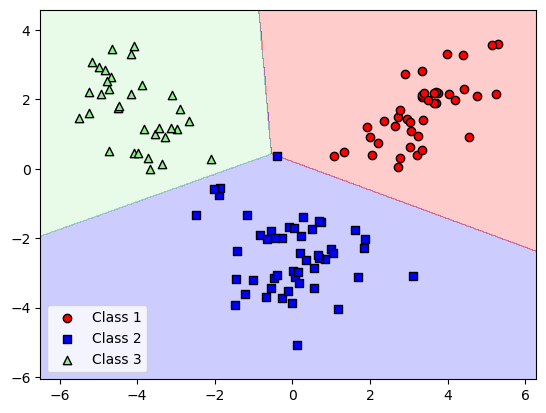

In [6]:
plot_decision_regions2(X_train_lda, y_train, classifier=lr)

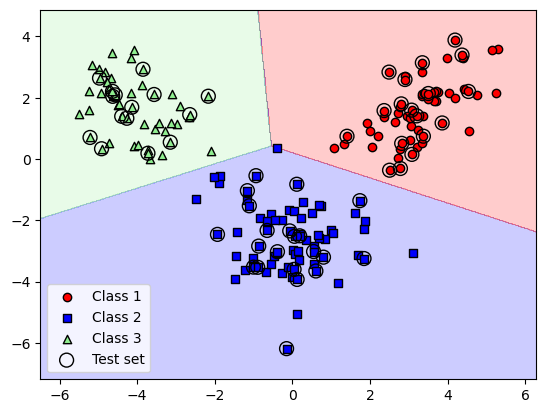

In [7]:
# Plot all examples and circle the testing data

X_test_lda = lda.transform(X_test_std)

X_lda = np.concatenate((X_train_lda, X_test_lda), axis=0)
# We cannot use y directly, because its order is not the same as X_train_pca and X_test_pca
# Therefore, we concatenate y_train, y_test
y_lda = np.concatenate((y_train, y_test))

# Plot
plot_decision_regions2(X_lda, y_lda, classifier=lr, circle_test=True, X_test=X_test_lda)